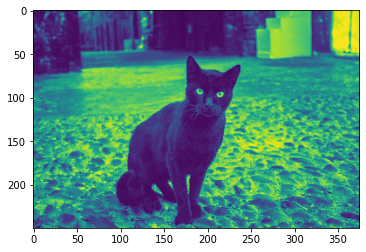

In [9]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('Imgs/cat.tiff')
plt.imshow(img)

In [10]:
def simple_treshold(img):
  num_rows, num_cols = img.shape
  threshold = np.mean(img)
  has_finished = False
  
  while not has_finished:
    print(threshold)
    num_back = 0
    sum_back = 0
    num_fore = 0
    sum_fore = 0
    for row in range(num_rows):
      for col in range(num_cols):
        if img[row, col]<threshold:
          num_back += 1
          sum_back += img[row, col]
        else:
          num_fore += 1
          sum_fore += img[row,col]
    mean_back = sum_back / num_back
    mean_fore = sum_fore / num_fore
    
    ''' # Com numpy
    #mean_back = np.mean(img[img<threshold])
    img_bin = img < threshold
    mean_back = np.mean(img[img_bin==False])
    mean_fore = np.mean(img[img_bin==True]) '''
    
    prev_threshold = threshold
    threshold = (mean_back + mean_fore) / 2
    if np.abs(threshold - prev_threshold) < 1e-6:
      has_finished = True
    
  return threshold

In [12]:
threshold = simple_treshold(img)
print(threshold)

107.110016
103.03784741892899
101.23384919590512
100.36097551526422
99.90981434502736
99.53850551142071
99.53850551142071


In [13]:
def threshold_otsu_naive(img):
  num_rows, num_cols = img.shape
  num_pixels = num_rows * num_cols
  sum_img = np.sum(img)
  
  m_G = sum_img / num_pixels
  
  
  max_sigma_I = -1
  for threshold in range(0, 256):
    num_back = 0
    sum_back = 0
    for row in range(num_rows):
      for col in range(num_cols):
        if img[row, col] <= threshold:
          num_back += 1
          sum_back += img[row, col]
    num_fore = num_pixels - num_back
    sum_fore = sum_img - sum_back
    
    if num_back == 0 or num_fore == 0:
      continue
    
    p_back = num_back / num_pixels
    p_fore = num_fore / num_pixels
    m_back = sum_back / num_back
    m_fore = sum_fore / num_fore
    
    sigma_I = p_back * (m_back - m_G) ** 2 + p_fore * (m_fore - m_G) ** 2
    if sigma_I > max_sigma_I:
      max_sigma_I = sigma_I
      best_threshold = threshold
      
  return best_threshold

In [14]:
threshold = threshold_otsu_naive(img)

In [16]:
threshold

99

In [15]:
def threshold_otsu(img):
  
  bins = range(257)
  hist, _ = np.histogram(img, bins)
  
  num_pixels = img.shape[0] * img.shape[1]
  sum_img = np.sum(img)
  m_G = sum_img / num_pixels
  max_sigma_I = -1
  
  num_back = 0
  sum_back = 0
  sigma_vals = np.zeros(256)
  
  for threshold in range(256):
    num_back += hist[threshold]
    sum_back += threshold * hist[threshold]
    
    num_fore = num_pixels - num_back
    sum_fore = sum_img - sum_back
    
    if num_back == 0 or num_fore == 0:
      continue
    
    p_back = num_back / num_pixels
    p_fore = num_fore / num_pixels
    m_back = sum_back / num_back
    m_fore = sum_fore / num_fore
    
    sigma_I = p_back * (m_back - m_G) ** 2 + p_fore * (m_fore - m_G) ** 2
    if sigma_I > max_sigma_I:
      max_sigma_I = sigma_I
      best_threshold = threshold
      
    sigma_vals[threshold] = sigma_I
    
  return best_threshold, sigma_vals

In [18]:
threshold, sigma_vals = threshold_otsu(img)
threshold

99

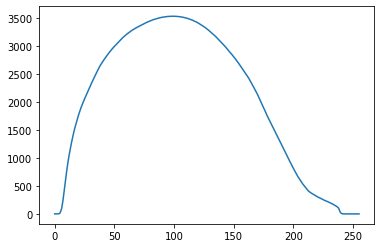

In [19]:
plt.plot(range(256), sigma_vals)